In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
from pylab import rcParams
import warnings

warnings.simplefilter("ignore")
rcParams["figure.figsize"] = 10, 5
sns.set()

In [3]:
df = pd.read_csv('all_mtg_cards.csv')

In [4]:
df.head()

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550.0,normal,NaN,{5}{W}{W},7.0,['White'],['W'],Creature — Human Cleric,NaN,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","['10E', 'JUD', 'UMA']",First strike (This creature deals combat damag...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,Ancestor's Chosen,NaN,normal,NaN,{5}{W}{W},7.0,['White'],['W'],Creature — Human Cleric,NaN,...,NaN,"['10E', 'JUD', 'UMA']",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,Angel of Mercy,129465.0,normal,NaN,{4}{W},5.0,['White'],['W'],Creature — Angel,NaN,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",Flying (This creature can't be blocked except ...,Creature - Angel,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
3,Angel of Mercy,NaN,normal,NaN,{4}{W},5.0,['White'],['W'],Creature — Angel,NaN,...,NaN,"['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
4,Angelic Blessing,129711.0,normal,NaN,{2}{W},3.0,['White'],['W'],Sorcery,NaN,...,"[{'name': 'Himmlischer Segen', 'text': 'Eine K...","['10E', '9ED', 'EXO', 'P02', 'POR', 'PS11', 'S...",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66770 entries, 0 to 66769
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            66770 non-null  object 
 1   multiverse_id   47455 non-null  float64
 2   layout          66770 non-null  object 
 3   names           0 non-null      float64
 4   mana_cost       58100 non-null  object 
 5   cmc             66770 non-null  float64
 6   colors          52612 non-null  object 
 7   color_identity  59739 non-null  object 
 8   type            66770 non-null  object 
 9   supertypes      9912 non-null   object 
 10  subtypes        40903 non-null  object 
 11  rarity          66770 non-null  object 
 12  text            65805 non-null  object 
 13  flavor          34412 non-null  object 
 14  artist          66759 non-null  object 
 15  number          66770 non-null  object 
 16  power           31332 non-null  object 
 17  toughness       31332 non-null 

### Видно, что очень много пропущенных значений содержится в датасете. Также в описании сказано, что есть дубликаты в данных

# Data cleaning

In [6]:
df_no_dubs = df.drop_duplicates(subset="name")
df_no_dubs.head()

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550.0,normal,NaN,{5}{W}{W},7.0,['White'],['W'],Creature — Human Cleric,NaN,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","['10E', 'JUD', 'UMA']",First strike (This creature deals combat damag...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
2,Angel of Mercy,129465.0,normal,NaN,{4}{W},5.0,['White'],['W'],Creature — Angel,NaN,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",Flying (This creature can't be blocked except ...,Creature - Angel,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
4,Angelic Blessing,129711.0,normal,NaN,{2}{W},3.0,['White'],['W'],Sorcery,NaN,...,"[{'name': 'Himmlischer Segen', 'text': 'Eine K...","['10E', '9ED', 'EXO', 'P02', 'POR', 'PS11', 'S...",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382
6,Angelic Chorus,129710.0,normal,NaN,{3}{W}{W},5.0,['White'],['W'],Enchantment,NaN,...,"[{'name': 'Choral der Engel', 'text': 'Immer w...","['10E', 'BBD', 'USG']",Whenever a creature comes into play under your...,Enchantment,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,3b77bb52-4181-57f5-b3cd-f3a15b95aa29
7,Angelic Wall,129671.0,normal,NaN,{1}{W},2.0,['White'],['W'],Creature — Wall,NaN,...,"[{'name': 'Mauer der Engel', 'text': 'Verteidi...","['10E', 'AVR', 'M14', 'ODY', 'P02']","Defender, flying (This creature can't attack, ...",Creature - Wall,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,fadda48c-6226-5ac5-a2b9-e9170d2017cd


In [7]:
df.shape, df_no_dubs.shape

((66770, 39), (24121, 39))

# 1. Распределение карт по цвету в зависимости от редкости

### У признака color_identity значения являются как строками в виде списков. Преобразуем их сначала в список, а потом создадим новый признак, в котором цвета будут в отдельных категориях. То есть если карточка содержит несколько цветов, то она - разноцветная (Multi)

In [8]:
def string_to_list(string):
    res = string.strip('][').split(', ')
    return res

In [9]:
def color_to_category(x):
    size = len(x)
    if size == 1:
        x = x[0]
    elif size == 0:
        x = 'NA'
    else:
        x = 'Multi'
    return x

In [10]:
# without dublicates 
df_no_dubs["color_category"] = df_no_dubs["color_identity"].apply(str)
df_no_dubs["color_category"] = df_no_dubs["color_category"].apply(lambda x: string_to_list(x))
df_no_dubs["color_category"] = df_no_dubs["color_category"].apply(lambda x: color_to_category(x))

In [11]:
# with dublicates
df["color_category"] = df["color_identity"].apply(str)
df["color_category"] = df["color_category"].apply(lambda x: string_to_list(x))
df["color_category"] = df["color_category"].apply(lambda x: color_to_category(x))

In [12]:
df_no_dubs.groupby(['color_category', 'rarity']).agg({'color_category': 'count'})

color_category
color_category rarity                  
'B'            Common              1437
               Mythic               136
               Rare                1036
               Uncommon            1040
'G'            Common              1407
               Mythic               129
               Rare                 975
               Uncommon            1032
'R'            Common              1417
               Mythic               134
               Rare                1011
               Special                2
               Uncommon            1041
'U'            Common              1412
               Mythic               133
               Rare                1026
               Uncommon            1025
'W'            Common              1452
               Mythic               132
               Rare                1002
               Special                1
               Uncommon            1037
Multi          Common               662
               Mythic               482
               Rare                1281
               Uncommon            1188
nan            Common               628
               Mythic               100
               Rare                 973
               Special                2
               Uncommon             788

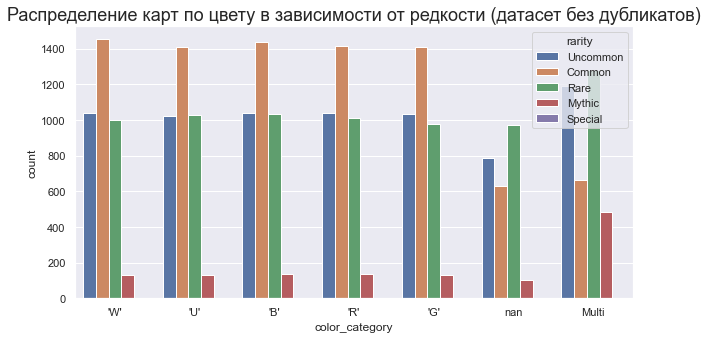

In [13]:
sns.countplot(x='color_category', hue='rarity', data=df_no_dubs)
plt.title('Распределение карт по цвету в зависимости от редкости (датасет без дубликатов)', fontsize=18)
plt.show();

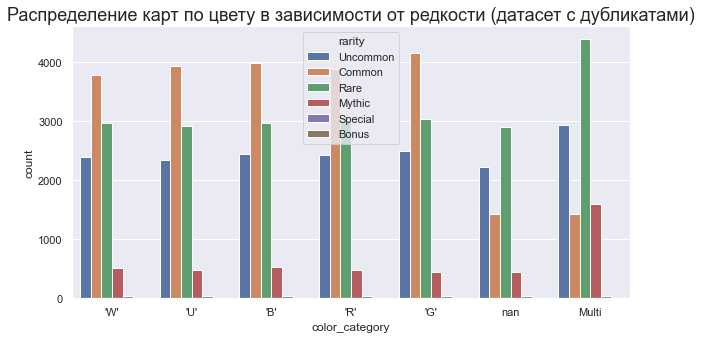

In [14]:
sns.countplot(x='color_category', hue='rarity', data=df)
plt.title('Распределение карт по цвету в зависимости от редкости (датасет c дубликатами)', fontsize=18)
plt.show();

# 2. Процент карт, запрещенных в формате Commander, а также распределение по типу для этих карт.

### Преобразуем признак legalities в нормальный вид (список словарей). Для этого сначала приведем строку к списку, а потом содержимое списка в словари.

In [15]:
df_no_dubs["legalities"] = df_no_dubs["legalities"].apply(str)
df_no_dubs["legalities"] = df_no_dubs["legalities"].apply(lambda x: string_to_list(x))

In [16]:
import ast

In [17]:
# Объединение пар значений в списке для словарей
def unite_pairs(x):
    res = [i + ',' + j for i, j in zip(x[::2], x[1::2])]
    return res

In [18]:
df_no_dubs['legalities'] = df_no_dubs['legalities'].apply(lambda x: unite_pairs(x))

In [19]:
df_no_dubs['legalities'] = df_no_dubs['legalities'].apply(lambda x: [ast.literal_eval(i) for i in x])

In [20]:
def commander_check(x):
    if {'format': 'Commander', 'legality': 'Legal'} in x:
        return 'Legal'
    else:
        return 'Restricted'

### Создадим отдельный признак, который говорит о том запрещена ли карта в формате Commander или нет. Отдельный момент в некоторых картах не пишется про легальность формата Commander, в таких случаях карта запрещена в формате Commander

In [21]:
df_no_dubs['commander_check'] = df_no_dubs['legalities'].apply(lambda x: commander_check(x))

In [22]:
df_no_dubs['commander_check'].value_counts()

Legal         22863
Restricted     1258
Name: commander_check, dtype: int64

In [23]:
print((df_no_dubs['commander_check'][df_no_dubs['commander_check'] == 'Restricted'].shape[0] / df_no_dubs.shape[0]) * 100)

5.21537249699432


## Процент карт, запрещенных в формате Commander, равно 5.2%

In [24]:
card_commander_types = df_no_dubs[["name", "type", "commander_check"]]
card_commander_types = card_commander_types.explode("type")
card_commander_types.head()

,name,type,commander_check
0,Ancestor's Chosen,Creature — Human Cleric,Legal
2,Angel of Mercy,Creature — Angel,Legal
4,Angelic Blessing,Sorcery,Legal
6,Angelic Chorus,Enchantment,Legal
7,Angelic Wall,Creature — Wall,Legal


In [25]:
card_types_by_commander = card_commander_types.groupby(['type', 'commander_check']).count()
card_types_by_commander.head(10)

name
type                                commander_check      
Artifact                            Legal            1064
                                    Restricted         58
Artifact Creature — Angel           Legal               4
                                    Restricted          1
Artifact Creature — Angel Warrior   Legal               1
Artifact Creature — Artificer       Legal               1
Artifact Creature — Assembly-Worker Legal               7
Artifact Creature — Beast           Legal               8
Artifact Creature — Berserker       Legal               1
Artifact Creature — Bird            Legal              14

In [26]:
restricted_types = card_types_by_commander.loc[card_types_by_commander.index.get_level_values("commander_check") == "Restricted"]
restricted_types = restricted_types.sort_values(by="name", ascending=False)
print(restricted_types.head(30))

                                               name
type                          commander_check      
Sorcery                       Restricted        123
Vanguard                      Restricted        107
Instant                       Restricted         89
Enchantment                   Restricted         65
Artifact                      Restricted         58
Scheme                        Restricted         58
Artifact — Contraption        Restricted         45
Conspiracy                    Restricted         25
Enchantment — Aura            Restricted         19
Land                          Restricted         17
Hero                          Restricted         16
Creature — Zombie             Restricted         13
Ongoing Scheme                Restricted         12
Creature — Elemental          Restricted          9
Creature — Beast              Restricted          8
Creature — Bird               Restricted          8
Creature — Human Wizard       Restricted          8
Plane — Ravn

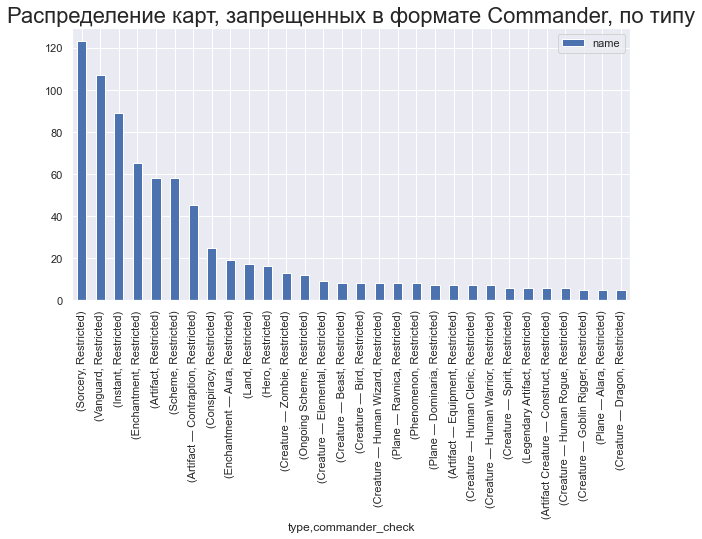

In [27]:
restricted_types.head(30).plot(kind="bar")
plt.title('Распределение карт, запрещенных в формате Commander, по типу', fontsize=22)
plt.show();

# 3. Топ-10 карт, не являющихся землями, которые были напечатаны в наибольшем количестве сетов.

### Я понял фразу были напечатаны в наибольшем количестве сетов как длина списка в признаке ***printings*** . Преобразуем признак в список

In [28]:
df_no_dubs['printings'] = df_no_dubs['printings'].apply(lambda x: string_to_list(x))
df_no_dubs['printings_count'] = df_no_dubs['printings'].apply(lambda x: len(x))

In [29]:
card_type_print = df_no_dubs.loc[:, ['name', 'type', 'printings_count']]

In [30]:
def land_or_not(x):
    if 'Land' in x:
        return True
    else:
        return False

### Отдельный признак, является ли карта землей (Land) или нет

In [31]:
card_type_print['land'] = card_type_print['type'].apply(lambda x: land_or_not(x))

In [32]:
card_type_print['land'].value_counts()

False    23311
True       810
Name: land, dtype: int64

In [33]:
card_type_print[card_type_print['land'] == False].sort_values('printings_count', ascending=False).head(10)

,name,type,printings_count,land
358,Giant Growth,Instant,47,False
562,Counterspell,Instant,46,False
53,Serra Angel,Creature — Angel,42,False
548,Swords to Plowshares,Instant,42,False
606,Dark Ritual,Instant,41,False
777,Sol Ring,Artifact,41,False
526,Disenchant,Instant,41,False
367,Llanowar Elves,Creature — Elf Druid,40,False
657,Fireball,Sorcery,35,False
93,Air Elemental,Creature — Elemental,33,False


## Итого в топ 10 карт, не являющимися землями и напечатанными в наибольшем количества сетов, входит:
   * Giant Growth
   * Counterspell
   * Serra Angel
   * Swords to Plowshares
   * Dark Ritual
   * Sol Ring	
   * Disenchant
   * Llanowar Elves
   * Fireball
   * Air Elemental

# 4. Для карт, не являющихся землями, определите, какая часть из них даёт ману с помощью своего эффекта. Покажите распределение по типу маны, который дают эти карты. 

### Так и понял как определить, что карта дает ману с помощью своего эффекта. В каком именно признаке описаны эффекты карт мне тоже не понятно. Попытался поискать, оказалось все не так просто. В каждой карте должно быть прописано может ли она давать ману. На Kaggle нет описания данных, впервые столкнулся с этой игрой

In [34]:
df_no_dubs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24121 entries, 0 to 66611
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             24121 non-null  object 
 1   multiverse_id    21390 non-null  float64
 2   layout           24121 non-null  object 
 3   names            0 non-null      float64
 4   mana_cost        22895 non-null  object 
 5   cmc              24121 non-null  float64
 6   colors           20728 non-null  object 
 7   color_identity   21630 non-null  object 
 8   type             24121 non-null  object 
 9   supertypes       2016 non-null   object 
 10  subtypes         15107 non-null  object 
 11  rarity           24121 non-null  object 
 12  text             23780 non-null  object 
 13  flavor           14555 non-null  object 
 14  artist           24120 non-null  object 
 15  number           24121 non-null  object 
 16  power            12898 non-null  object 
 17  toughness   

In [35]:
df_no_dubs[['mana_cost', 'color_category']]

,mana_cost,color_category
0,{5}{W}{W},'W'
2,{4}{W},'W'
4,{2}{W},'W'
6,{3}{W}{W},'W'
7,{1}{W},'W'
...,...,...
66607,{2},nan
66608,{2},nan
66609,{1},nan
66610,NaN,nan


In [36]:
df_no_dubs['rulings'].dropna().loc[9]

"[{'date': '2004-10-04', 'text': 'Aura of Silence affects all opponents in a multiplayer game.'}]"